# Visualizing Samples and Labels of the SPEED Dataset

Starter kit for ESA's Kelvins pose estimation competition: https://gitlab.com/EuropeanSpaceAgency/speed-utils

This notebook helps to inspect the SPEED dataset. You can see samples from the dataset, with the corresponding ground truth labels visualized as projected axes.

In [1]:
from matplotlib import pyplot as plt
from random import randint
# !pwd
from utils import *

Let's set up the path to a local copy of the SPEED dataset, and instanciate the helper class.

In [2]:
dataset_root_dir = '../../speed'
dataset = SatellitePoseEstimationDataset(root_dir=dataset_root_dir)

First we show a number of random images from the dataset.

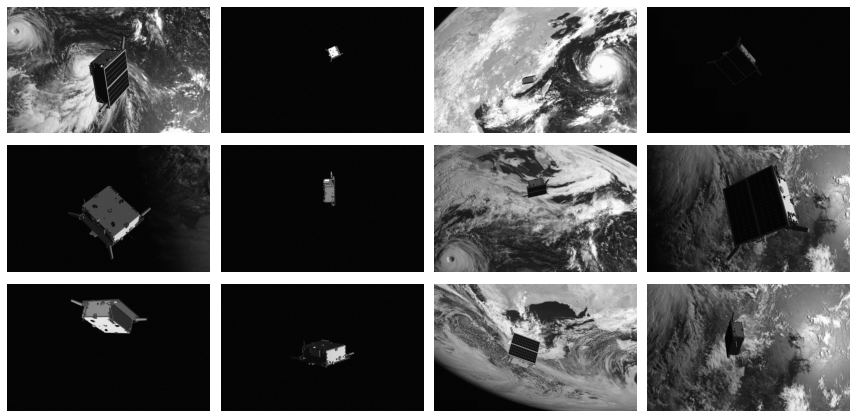

In [3]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
for i in range(rows):
    for j in range(cols):
        img = dataset.get_image(randint(0, 12000))
        axes[i][j].imshow(img)
        axes[i][j].axis('off')
fig.tight_layout()
        

    Visualize
   

q:  [0.154447, -0.911316, 0.136183, -0.356516]
r:  [0.279199, -0.062828, 8.581919]
points_body:  [[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 1 1 1]]
pose_mat:  [[ 0.70870112 -0.13808581  0.69186345  0.279199  ]
 [-0.35833708 -0.91520065  0.18439717 -0.062828  ]
 [ 0.60773124 -0.37860281 -0.69808499  8.581919  ]]
p_cam:  [[ 0.279199    0.98790012  0.14111319  0.97106245]
 [-0.062828   -0.42116508 -0.97802865  0.12156917]
 [ 8.581919    9.18965024  8.20331619  7.88383401]]
points_camera_frame:  [[ 0.0325334   0.10750138  0.01720197  0.12317135]
 [-0.00732097 -0.04583037 -0.11922357  0.01542006]
 [ 1.          1.          1.          1.        ]]
points_image_plane:  [[1.05771123e+03 1.28287105e+03 1.01166462e+03 1.32993442e+03]
 [5.78012094e+02 4.62352470e+02 2.41922382e+02 6.46312800e+02]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]
x:  [1057.71123424 1282.87105164 1011.66461525 1329.93441801]
y:  [578.01209379 462.3524703  241.92238228 646.31279987]


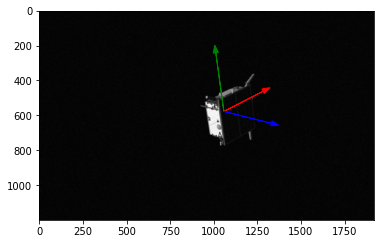

In [6]:
i = 15
img = dataset.get_image(i)
ax = plt.gca()
ax.imshow(img)
q, r = dataset.get_pose(i)
print("q: ", q)
print("r: ", r)
# q = [-0.044155, -0.393581, -0.707956, -0.584759]
# q = [0, 1, 0, 0]
# r = [-0.111403, 0.452985, 13.204556]
# r = [-0.111403, 0.452985, 8]
xa, ya = project(q, r) # NOTE: first coordinates are those of the interface point (body frame origin)
ax.arrow(xa[0], ya[0], xa[1] - xa[0], ya[1] - ya[0], head_width=30, color='r')
ax.arrow(xa[0], ya[0], xa[2] - xa[0], ya[2] - ya[0], head_width=30, color='g')
ax.arrow(xa[0], ya[0], xa[3] - xa[0], ya[3] - ya[0], head_width=30, color='b')

---

We can visualize the pose labels with projecting axes on the samples. The correspondence between colors and directions in the satellite body frame is: red - x, green - y, blue - z.

In [ ]:
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        dataset.visualize(randint(0, 12000), ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout()

## Wireframe and detection box visualization

In [ ]:
axes = plt.axes()
i = randint(0, 12000)
dataset.visualize(i, ax=axes,bb=True, pose=False)

In [ ]:
axes = plt.axes()
i = randint(0, 12000)
dataset.visualize(i, ax=axes,db=True, pose=False)

In [ ]:
axes = plt.axes()
i = randint(0, 12000)
dataset.visualize(i, ax=axes,db=True, bb=True, pose=True)

## Updating annotations with bb and db

In [ ]:
dataset.annotate(partition='real')

In [ ]:
dataset.annotate(partition='train')

## Preprocess training images

In [ ]:
dataset.preprocess()